In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.utils import resample
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
# Load dataset
mcdata = pd.read_csv('/content/mcdonalds.csv')

In [3]:
mcdata.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [4]:
# Display shape
print("Shape of the dataset:", mcdata.shape)

Shape of the dataset: (1453, 15)


In [5]:
# Display information
print("\nInformation about the dataset:")
print(mcdata.info())


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB
None


In [6]:
# Summary statistics
print("\nSummary statistics of the dataset:")
print(mcdata.describe())


Summary statistics of the dataset:
               Age
count  1453.000000
mean     44.604955
std      14.221178
min      18.000000
25%      33.000000
50%      45.000000
75%      57.000000
max      71.000000


In [7]:
# Checking for missing values
print(pd.isnull(mcdata).sum())

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64


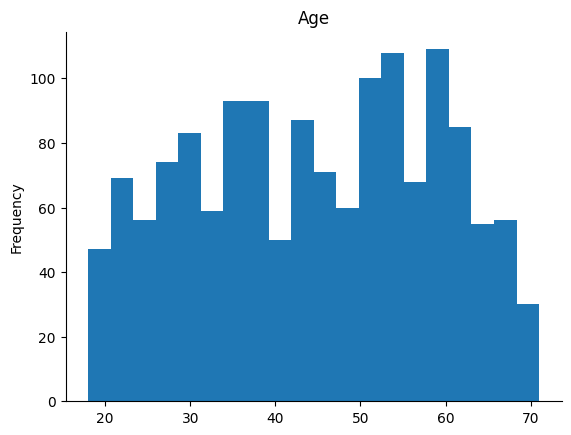

In [8]:
# Data Visualization
mcdata['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

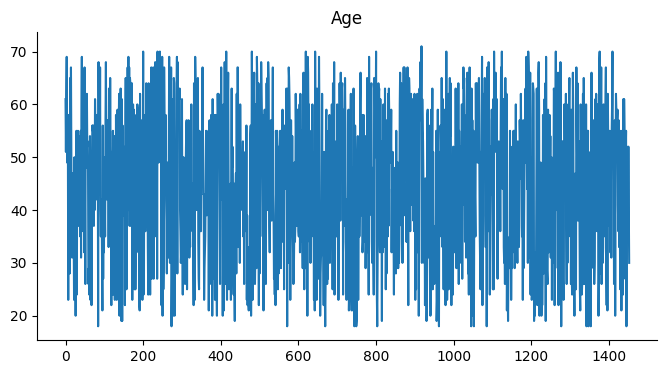

In [9]:
plt.figure(figsize=(8, 4))
mcdata['Age'].plot(kind='line')
plt.title('Age')
sns.despine()

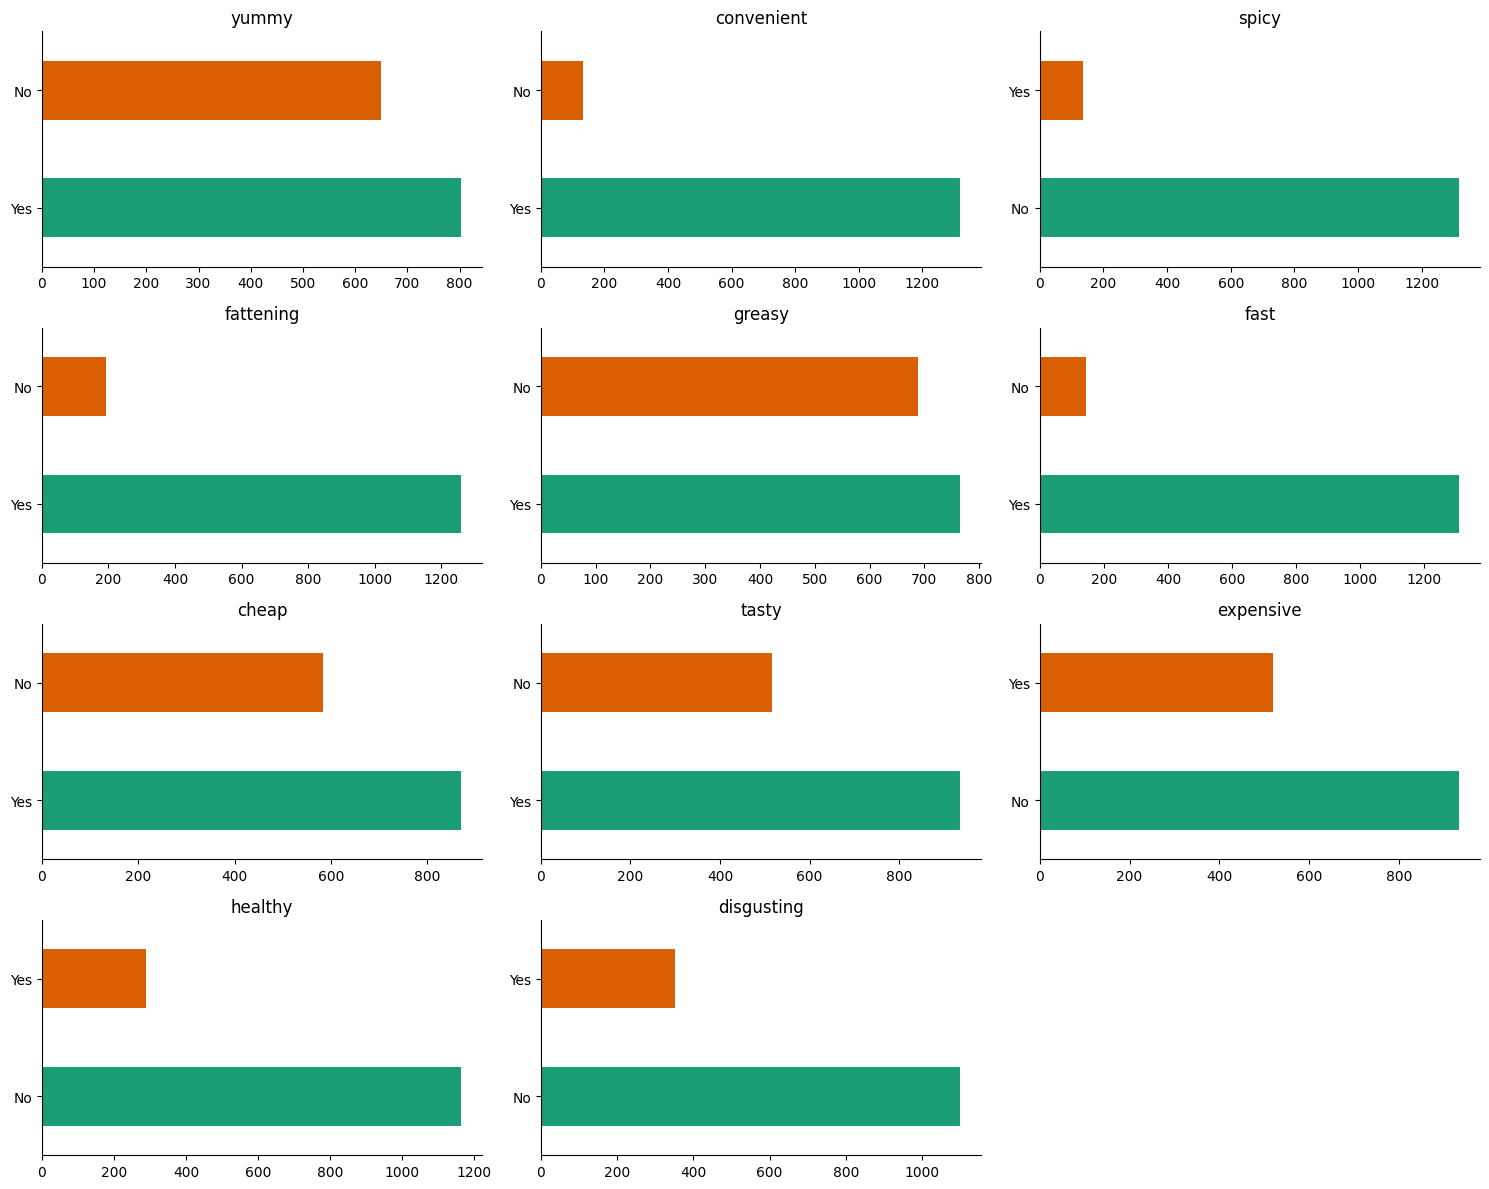

In [10]:
fig, axes = plt.subplots(4, 3, figsize=(15, 12), sharex=False, sharey=False)
fig.subplots_adjust(hspace=1.0)
columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
for i, col in enumerate(columns):
    row_index = i // 3
    col_index = i % 3
    ax = axes[row_index, col_index]
    mcdata[col].value_counts().plot(kind='barh', color=sns.color_palette("Dark2"), ax=ax)
    ax.set_title(col)
    sns.despine(ax=ax)
for i in range(len(columns), len(axes.flatten())):
    fig.delaxes(axes.flatten()[i])
plt.tight_layout()
plt.show()

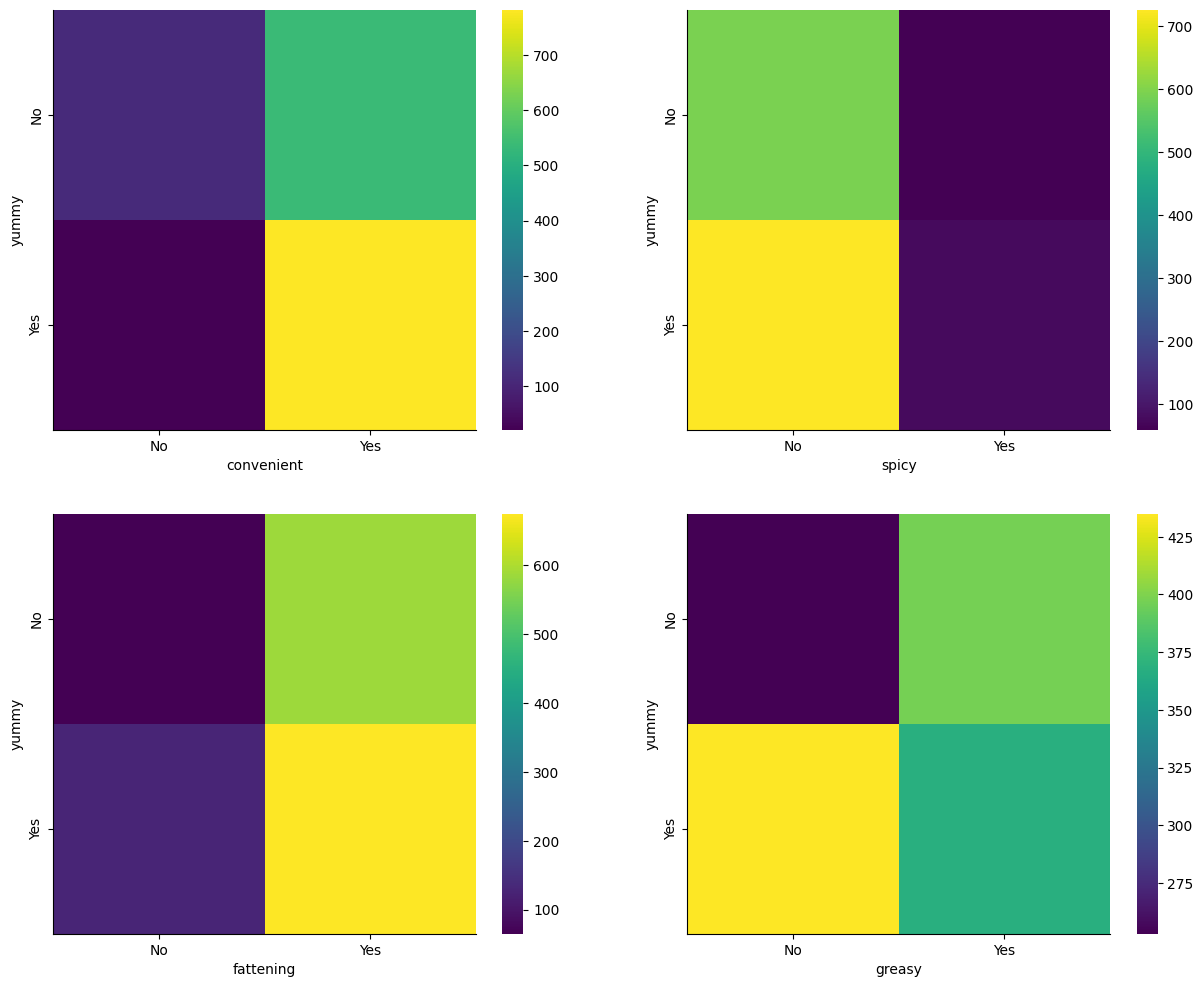

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
for i, col in enumerate(['convenient', 'spicy', 'fattening', 'greasy']):
    ax = axes.flatten()[i]
    pivot_table = mcdata.pivot_table(index='yummy', columns=col, aggfunc='size')
    sns.heatmap(pivot_table, cmap='viridis', ax=ax)
    ax.set_xlabel(col)
    ax.set_ylabel('yummy')
    sns.despine(ax=ax)

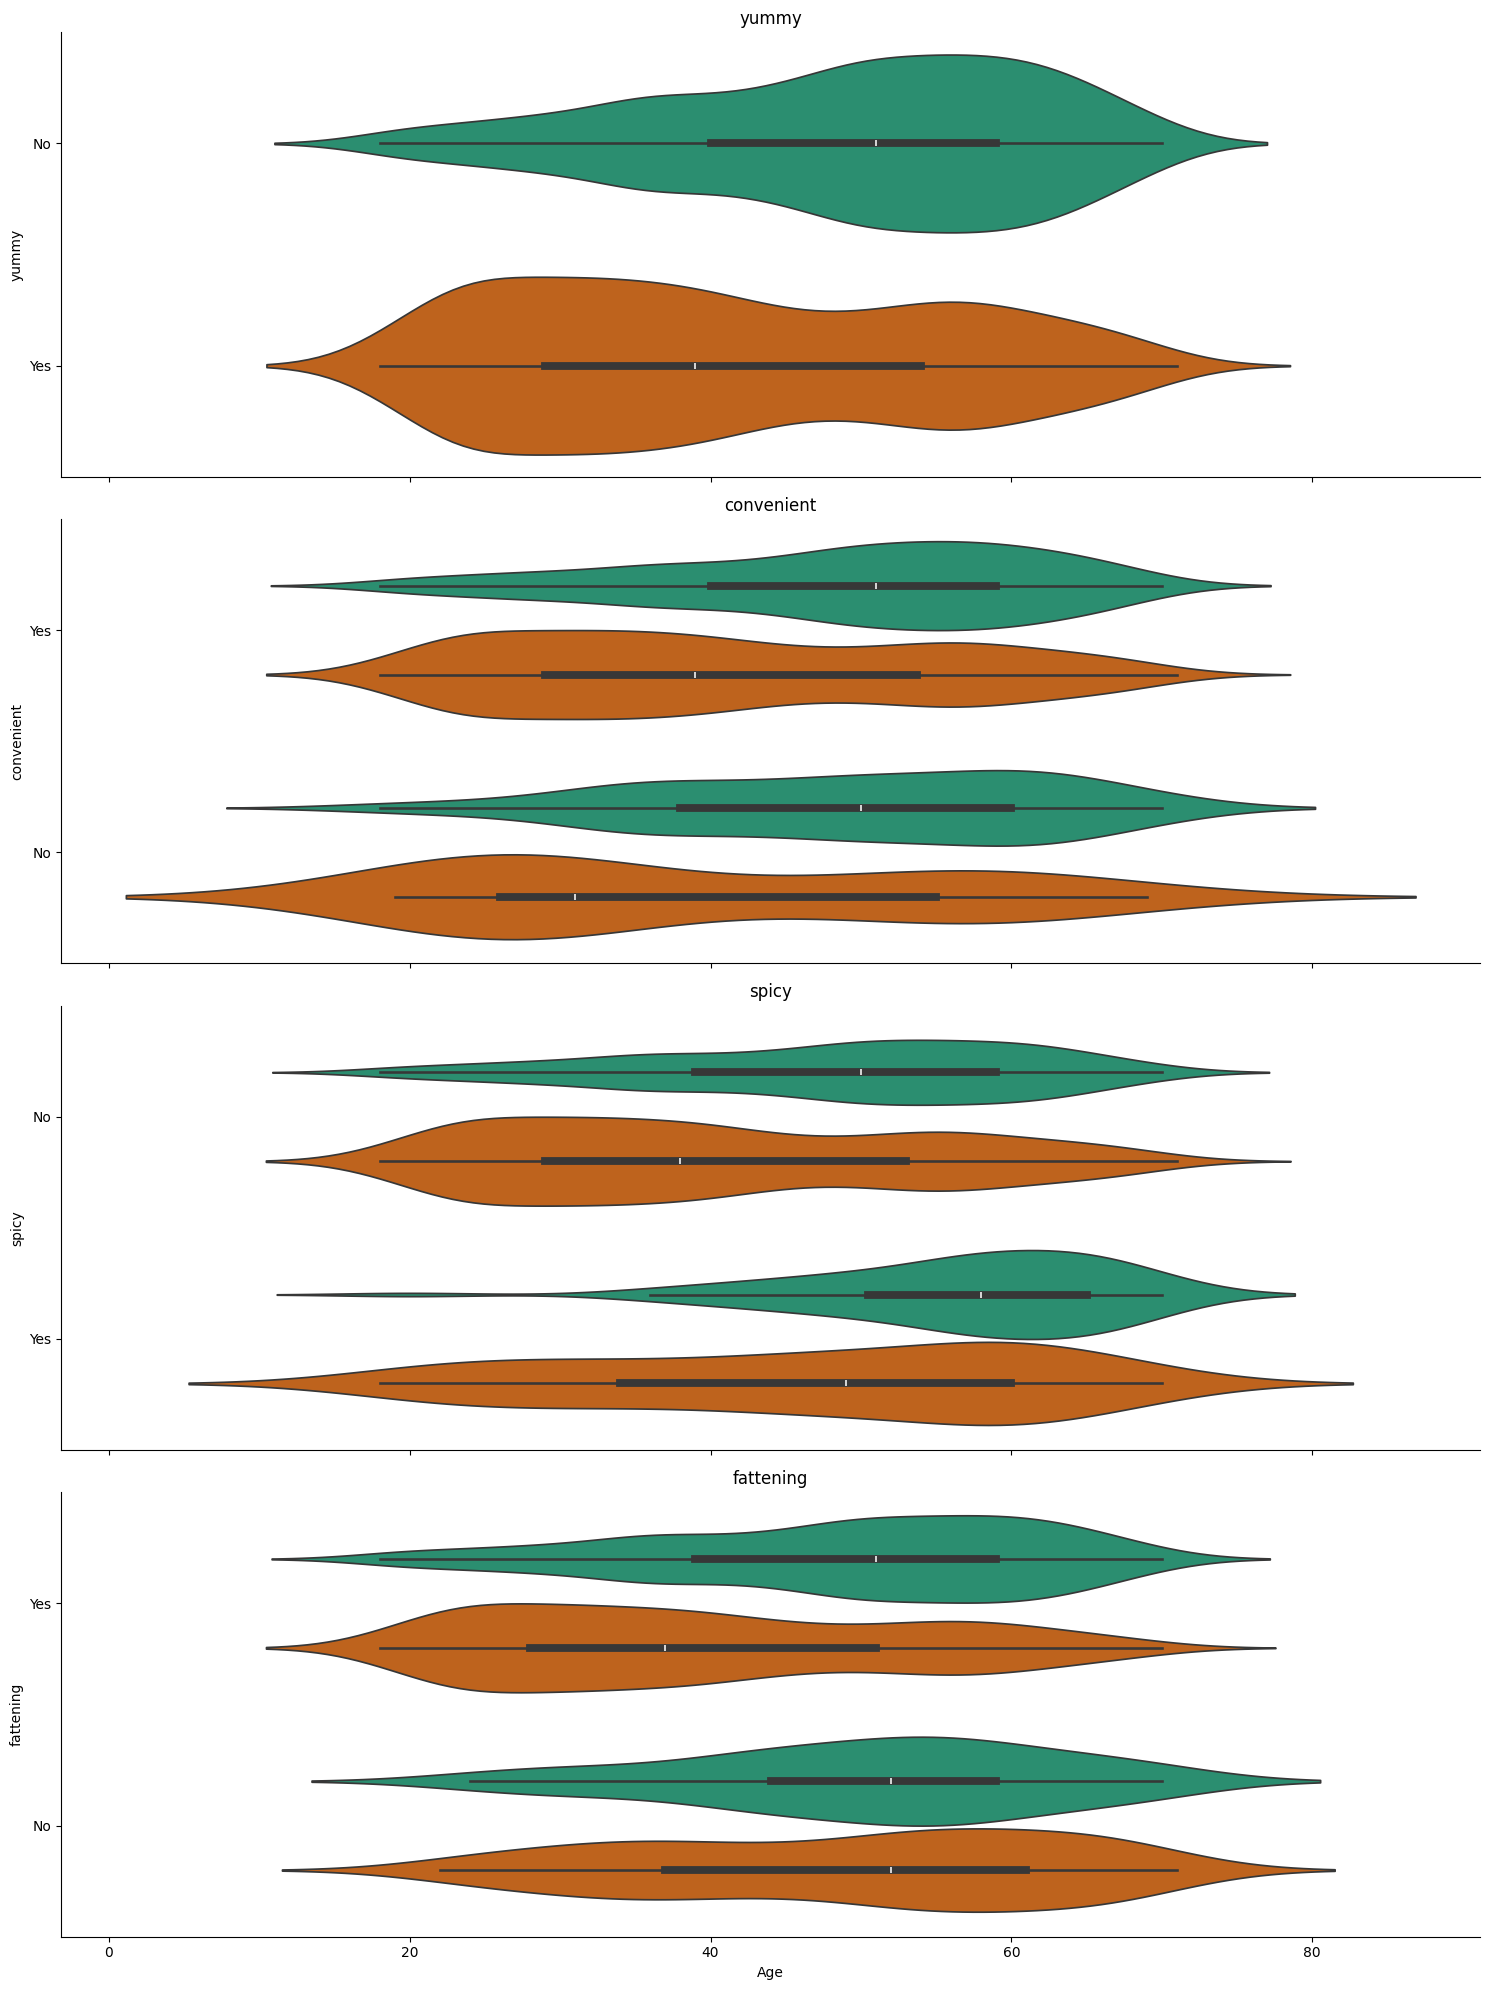

In [12]:
fig, axes = plt.subplots(4, 1, figsize=(15, 20), sharex=True)
fig.subplots_adjust(hspace=1.0)
for i, col in enumerate(['yummy', 'convenient', 'spicy', 'fattening']):
    ax = axes[i]
    sns.violinplot(data=mcdata, x='Age', y=col, hue='yummy', inner='box', palette='Dark2', ax=ax)
    ax.set_title(col)
    sns.despine(ax=ax)
    if i != 0:
        ax.legend().remove()
plt.tight_layout()
plt.show()

In [13]:
# Selecting only the first 11 columns
selected_columns = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
data = mcdata[selected_columns]

In [14]:
# Label Encoding
label_encoder = LabelEncoder()
data = data.apply(label_encoder.fit_transform)

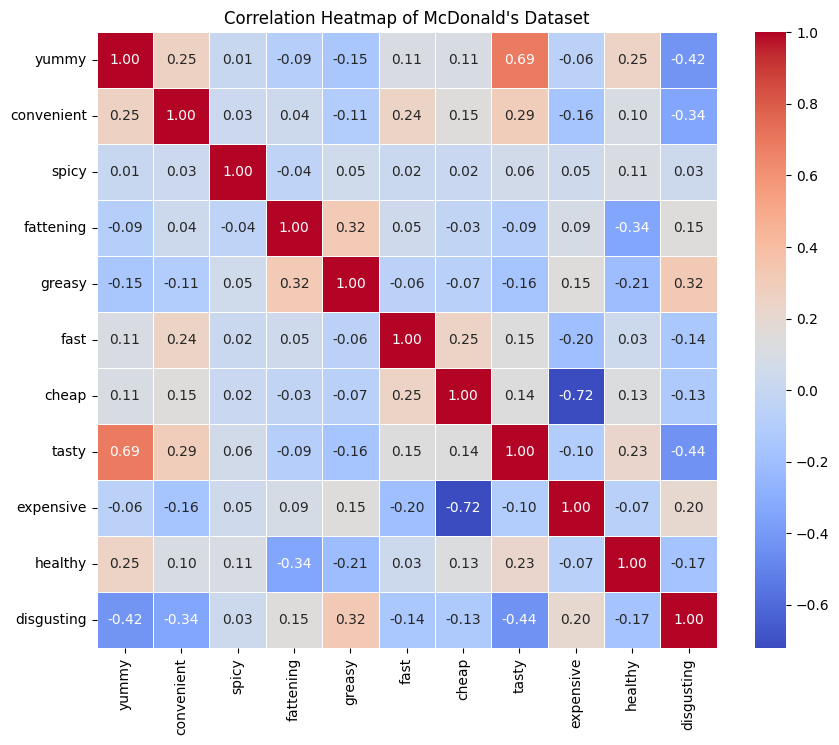

In [15]:
# Correlation
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of McDonald's Dataset")
plt.show()

In [16]:
# Perform PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
pca = PCA()
pca_data = pca.fit_transform(scaled_data)

In [17]:
# Summarize PCA Results
print("Principal Components:")
print(pca.components_)

Principal Components:
[[-0.40695508 -0.30882741 -0.02332033  0.17786071  0.26779582 -0.21303906
  -0.28913434 -0.42611499  0.29094445 -0.26683857  0.41074387]
 [ 0.28261487 -0.04568172  0.0699822  -0.20559024 -0.13630029 -0.28244059
  -0.57503178  0.24219851  0.56752776  0.20103082 -0.14388846]
 [-0.25958798 -0.31715142  0.0201696  -0.60807736 -0.38956798 -0.21139458
   0.1251574  -0.26964779 -0.18329788  0.36781371  0.09029919]
 [ 0.02623694 -0.00942396  0.84549641 -0.02339555  0.33085439  0.09036315
   0.11447698  0.0726908   0.03550987  0.30198954  0.23523093]
 [ 0.34685741 -0.43714795 -0.185551    0.08693385  0.3437128  -0.56893862
   0.25698101  0.2860986  -0.20736179  0.05178742  0.10584327]
 [-0.12491568  0.18896641  0.43866119  0.1075199  -0.27832865 -0.57273434
   0.02065707 -0.05305267 -0.17116009 -0.4461664  -0.32804054]
 [ 0.15987822 -0.66181418  0.21418844 -0.0238514  -0.30729985  0.39243636
  -0.00889462  0.19736396  0.01519838 -0.44944615 -0.01707024]
 [ 0.01658651  0.15

In [18]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

Explained Variance Ratio: [0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


In [19]:
column_means = np.mean(scaled_data, axis=0)
print("Column Means:", column_means)

Column Means: [-8.06879225e-17 -1.13085346e-16  3.66763284e-17 -1.71156199e-17
  5.62370369e-17  2.33505958e-16  3.54537841e-17  3.66763284e-17
  3.17861513e-17  7.09075683e-17 -2.93410627e-17]


In [20]:
std_dev = np.sqrt(pca.explained_variance_)
print("Standard deviations):")
print(np.round(std_dev, 1))

Standard deviations):
[1.7 1.3 1.2 1.  1.  0.9 0.8 0.8 0.7 0.6 0.5]


In [21]:
print("\nRotation (n x k) where k = min(n-1, p = 11):")
print(np.round(pca.components_, 1))


Rotation (n x k) where k = min(n-1, p = 11):
[[-0.4 -0.3 -0.   0.2  0.3 -0.2 -0.3 -0.4  0.3 -0.3  0.4]
 [ 0.3 -0.   0.1 -0.2 -0.1 -0.3 -0.6  0.2  0.6  0.2 -0.1]
 [-0.3 -0.3  0.  -0.6 -0.4 -0.2  0.1 -0.3 -0.2  0.4  0.1]
 [ 0.  -0.   0.8 -0.   0.3  0.1  0.1  0.1  0.   0.3  0.2]
 [ 0.3 -0.4 -0.2  0.1  0.3 -0.6  0.3  0.3 -0.2  0.1  0.1]
 [-0.1  0.2  0.4  0.1 -0.3 -0.6  0.  -0.1 -0.2 -0.4 -0.3]
 [ 0.2 -0.7  0.2 -0.  -0.3  0.4 -0.   0.2  0.  -0.4 -0. ]
 [ 0.   0.2 -0.  -0.7  0.5  0.1 -0.1  0.1 -0.1 -0.4 -0.1]
 [-0.2 -0.3  0.   0.1  0.3  0.1 -0.1 -0.2 -0.   0.2 -0.8]
 [ 0.7  0.   0.1 -0.  -0.   0.   0.1 -0.7  0.  -0.1 -0. ]
 [-0.1  0.  -0.  -0.1 -0.  -0.1  0.7  0.   0.7 -0.1 -0.1]]


In [22]:
summary_df = pd.DataFrame({"Principal Component": range(1, len(explained_variance_ratio) + 1), "Explained Variance Ratio": explained_variance_ratio, "Standard Deviation": np.sqrt(pca.explained_variance_)})
print("Summary:")
print(summary_df)

Summary:
    Principal Component  Explained Variance Ratio  Standard Deviation
0                     1                  0.255566            1.677250
1                     2                  0.148348            1.277868
2                     3                  0.125469            1.175207
3                     4                  0.098270            1.040053
4                     5                  0.083484            0.958620
5                     6                  0.071091            0.884613
6                     7                  0.064986            0.845774
7                     8                  0.053845            0.769870
8                     9                  0.047628            0.724065
9                    10                  0.027964            0.554809
10                   11                  0.023350            0.506983


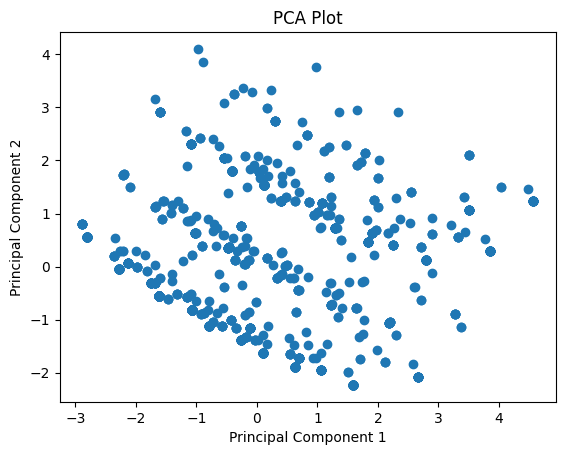

In [23]:
# Plot PCA Predictions
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Plot")
plt.show()

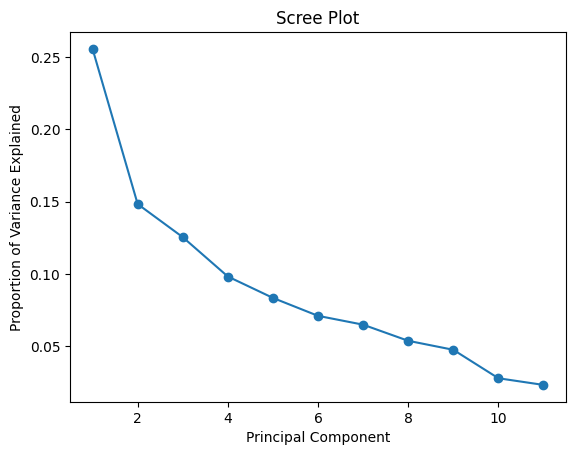

In [24]:
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.show()

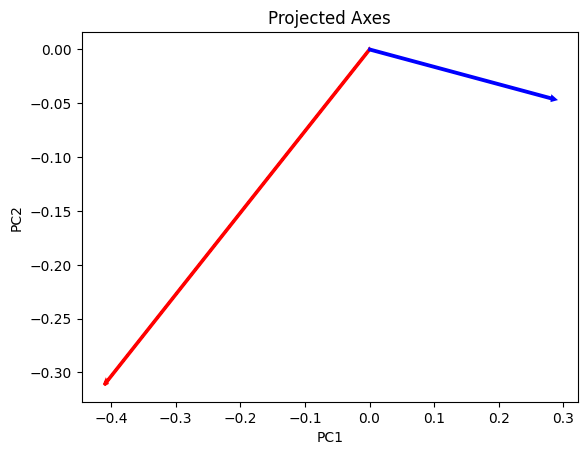

In [25]:
# Plot projected axes
plt.arrow(0, 0, pca.components_[0, 0], pca.components_[0, 1], color='red', linewidth=2)
plt.arrow(0, 0, pca.components_[1, 0], pca.components_[1, 1], color='blue', linewidth=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projected Axes')
plt.show()

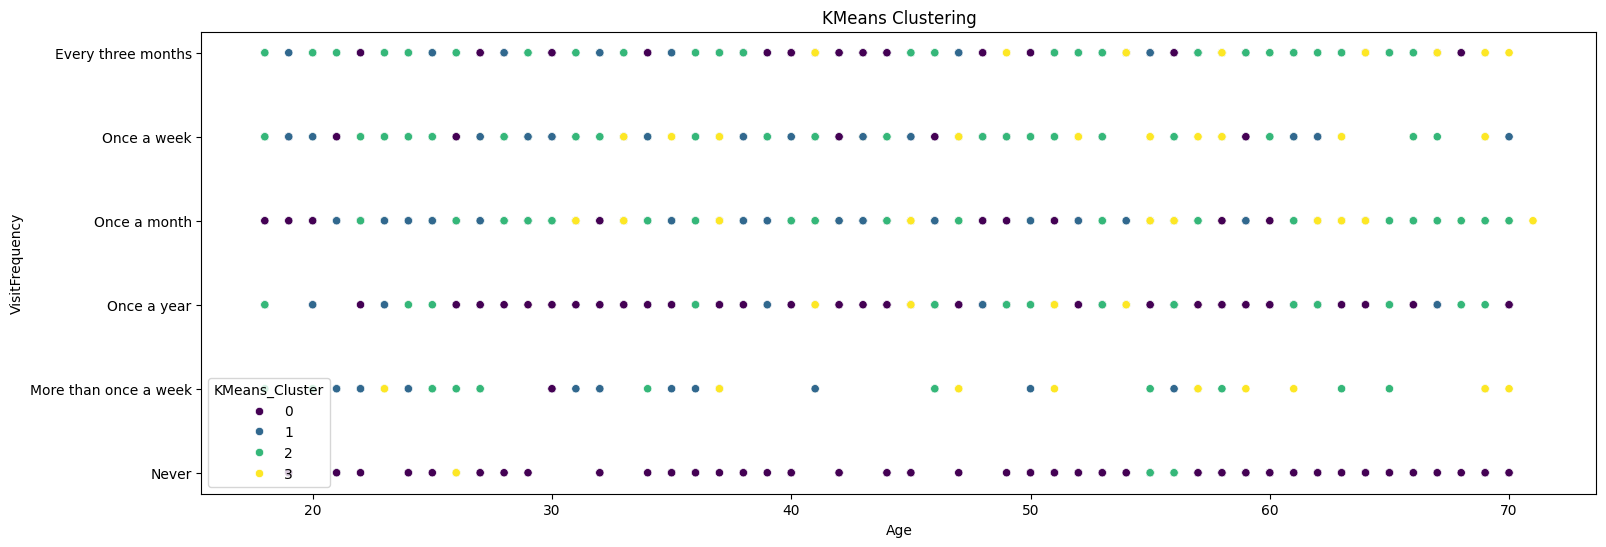

In [26]:
# KMeans Clustering
kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
kmeans.fit(scaled_data)
mcdata['KMeans_Cluster'] = kmeans.labels_
plt.figure(figsize=(18, 6))
sns.scatterplot(data=mcdata, x='Age', y='VisitFrequency', hue='KMeans_Cluster', palette='viridis')
plt.title('KMeans Clustering')
plt.show()

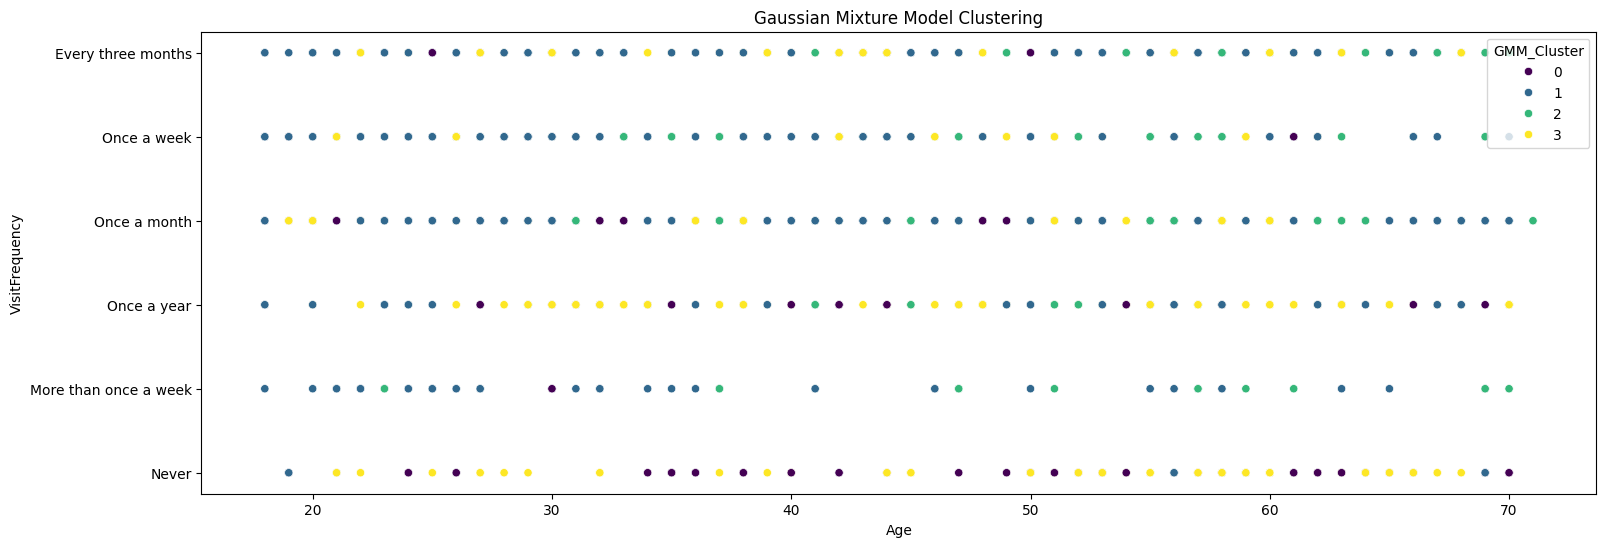

In [27]:
# Gaussian Mixture Model (GMM) Clustering
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(scaled_data)
mcdata['GMM_Cluster'] = gmm.predict(scaled_data)
plt.figure(figsize=(18, 6))
sns.scatterplot(data=mcdata, x='Age', y='VisitFrequency', hue='GMM_Cluster', palette='viridis')
plt.title('Gaussian Mixture Model Clustering')
plt.show()

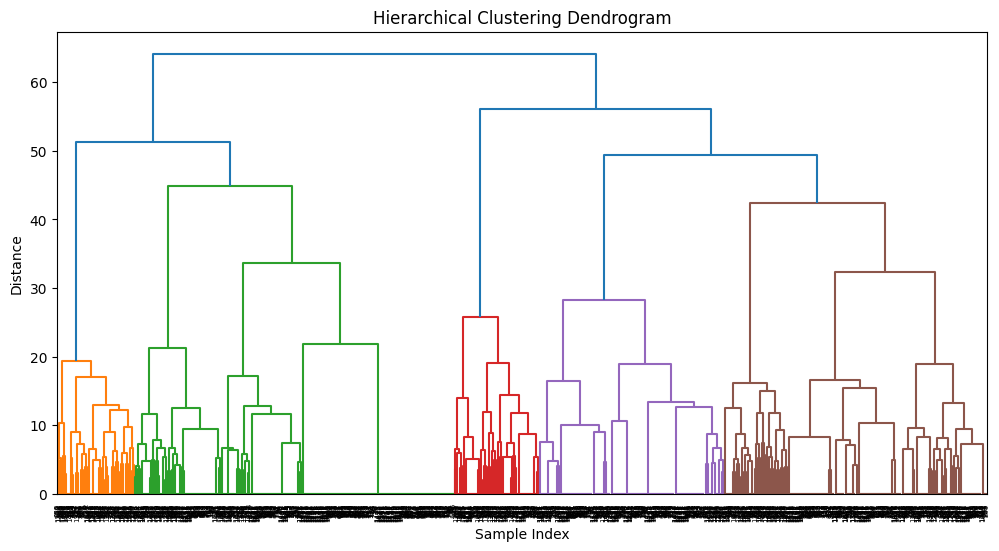

In [28]:
# Hierarchical Clustering
Z = linkage(scaled_data, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

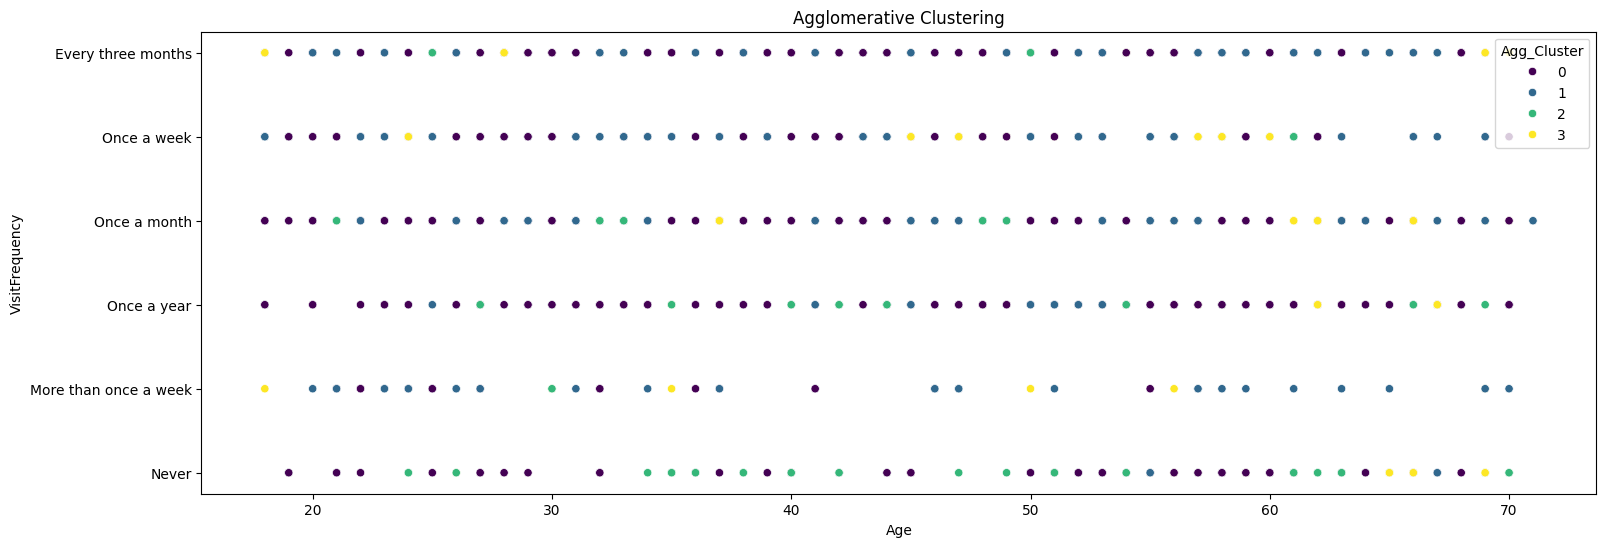

In [29]:
# Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=4)
mcdata['Agg_Cluster'] = agg_cluster.fit_predict(scaled_data)
plt.figure(figsize=(18, 6))
sns.scatterplot(data=mcdata, x='Age', y='VisitFrequency', hue='Agg_Cluster', palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [30]:
# Call functions to generate plots
cluster_range = range(2, 9)

In [31]:
# Scree Plot
def scree_plot(data, cluster_range, cluster_method):
    scores = []
    for k in cluster_range:
        if cluster_method == 'KMeans':
            cluster_model = KMeans(n_clusters=k, n_init=10, random_state=42)
        elif cluster_method == 'GMM':
            cluster_model = GaussianMixture(n_components=k, n_init=10, random_state=42)
        elif cluster_method == 'Hierarchical':
            cluster_model = AgglomerativeClustering(n_clusters=k)
            cluster_model.fit(data)
            scores.append(silhouette_score(data, cluster_model.labels_))
            continue
        cluster_model.fit(data)
        if cluster_method == 'KMeans':
            scores.append(cluster_model.inertia_)
        elif cluster_method == 'GMM':
            scores.append(cluster_model.bic(data))
    plt.plot(cluster_range, scores, marker='o')
    plt.xlabel('Number of Clusters')
    if cluster_method == 'KMeans':
        plt.ylabel('Sum of Within-Cluster Distances')
        plt.title(f'Scree Plot for {cluster_method} Clustering')
    elif cluster_method == 'GMM':
        plt.ylabel('BIC/AIC Score')
        plt.title(f'Scree Plot for {cluster_method} Clustering')
    elif cluster_method == 'Hierarchical':
        plt.ylabel('Silhouette Score')
        plt.title(f'Scree Plot for {cluster_method} Clustering')
    plt.show()

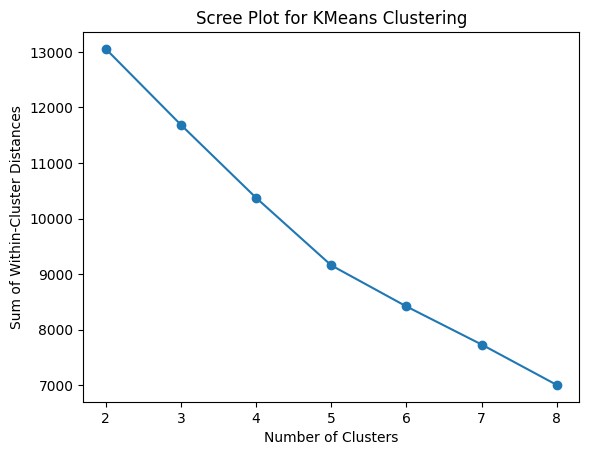

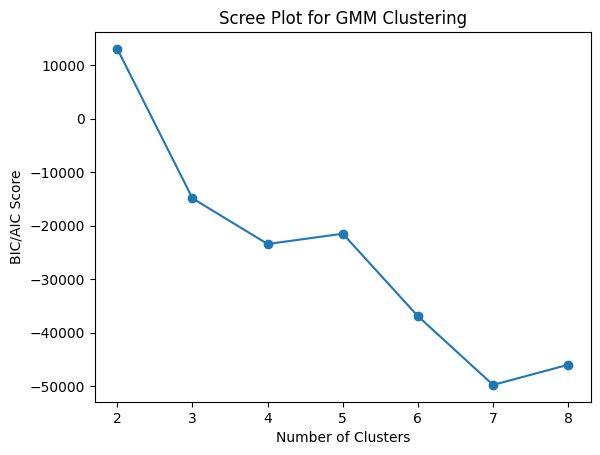

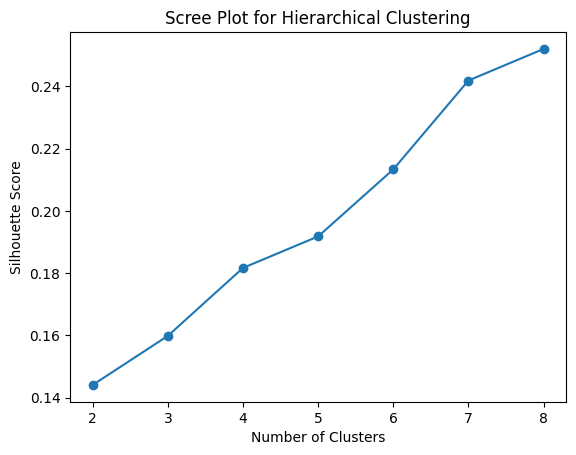

In [32]:
scree_plot(scaled_data, cluster_range, 'KMeans')
scree_plot(scaled_data, cluster_range, 'GMM')
scree_plot(scaled_data, cluster_range, 'Hierarchical')

In [33]:
# Global Stability Boxplot
def global_stability_boxplot(data, cluster_method, n_resamples=10):
    stability_scores = []
    for _ in range(n_resamples):
        resampled_data = resample(data, replace=True, random_state=42)
        if cluster_method == 'KMeans':
            cluster_model = KMeans(n_clusters=4, n_init=10, random_state=42)
        elif cluster_method == 'GMM':
            cluster_model = GaussianMixture(n_components=4, n_init=10, random_state=42)
        elif cluster_method == 'Hierarchical':
            cluster_model = AgglomerativeClustering(n_clusters=4)
        cluster_model.fit(resampled_data)
        if cluster_method == 'GMM':
            labels = cluster_model.predict(resampled_data)
        else:
            labels = cluster_model.labels_
        silhouette = silhouette_score(resampled_data, labels)
        stability_scores.append(silhouette)
    plt.figure(figsize=(8, 6))
    plt.boxplot(stability_scores, patch_artist=True, showmeans=True)
    plt.xlabel('Stability Score', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title(f'Global Stability Boxplot for {cluster_method} Clustering', fontsize=16)
    plt.grid(True)
    plt.show()

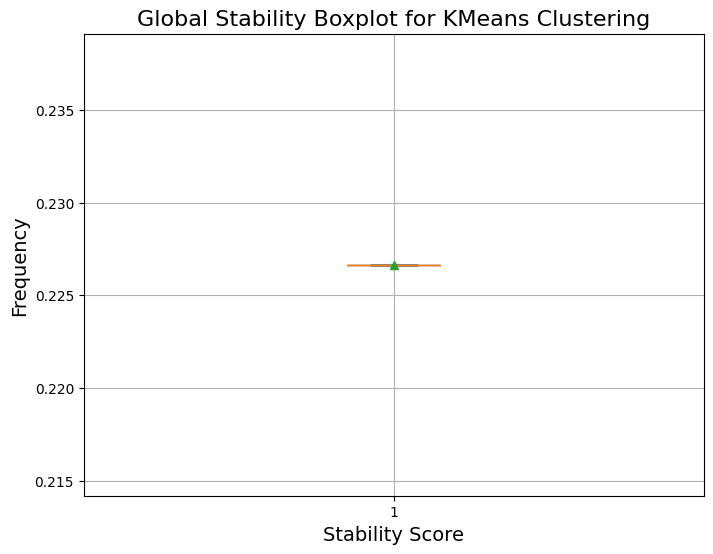

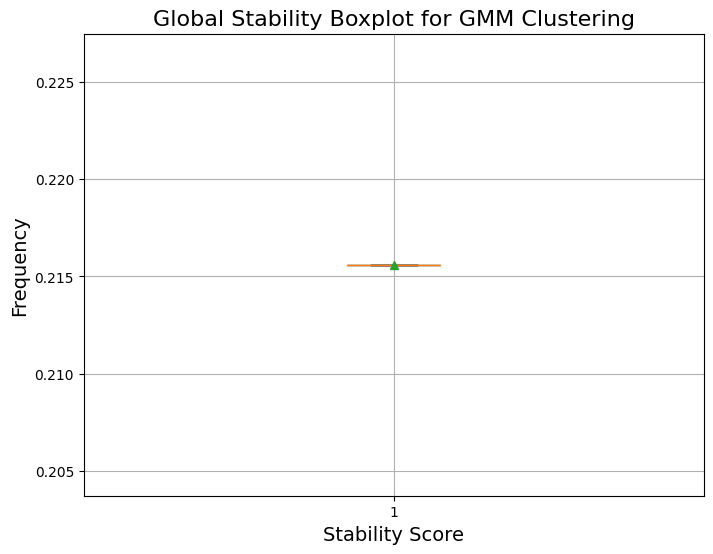

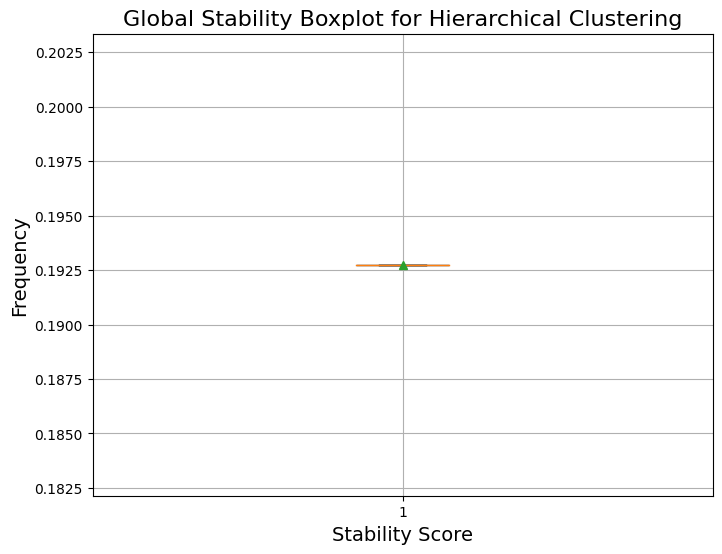

In [34]:
global_stability_boxplot(scaled_data, 'KMeans')
global_stability_boxplot(scaled_data, 'GMM')
global_stability_boxplot(scaled_data, 'Hierarchical')

In [35]:
# Gorge Plot
def gorge_plot(data, cluster_range, cluster_method):
    silhouette_scores = []
    for k in cluster_range:
        if cluster_method == 'KMeans':
            cluster_model = KMeans(n_clusters=k, n_init=10, random_state=42)
        elif cluster_method == 'GMM':
            cluster_model = GaussianMixture(n_components=k, n_init=10, random_state=42)
        elif cluster_method == 'Hierarchical':
            cluster_model = AgglomerativeClustering(n_clusters=k)
        cluster_model.fit(data)
        if cluster_method == 'GMM':
            labels = cluster_model.predict(data)
        else:
            labels = cluster_model.labels_
        silhouette_scores.append(silhouette_score(data, labels))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(f'Gorge Plot for {cluster_method} Clustering')
    plt.show()

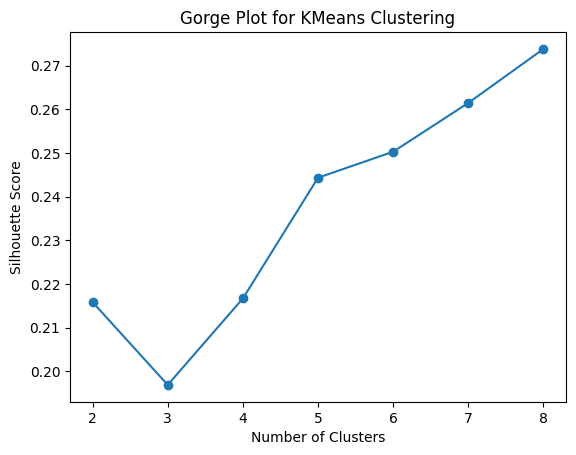

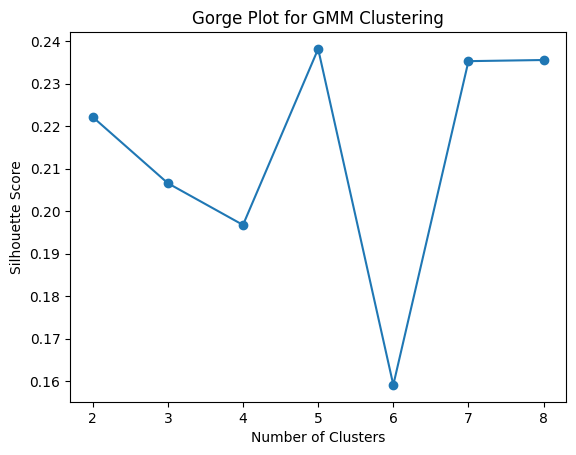

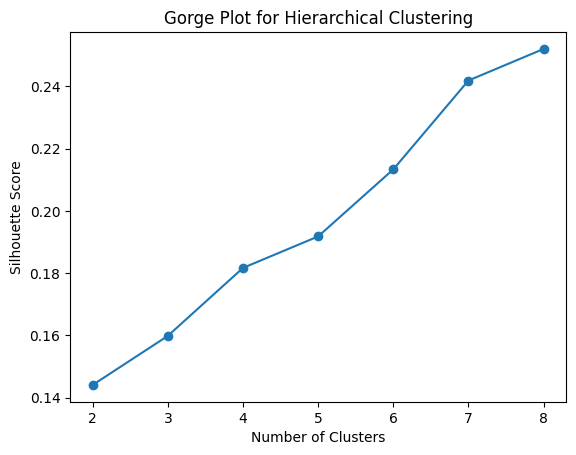

In [36]:
gorge_plot(scaled_data, cluster_range, 'KMeans')
gorge_plot(scaled_data, cluster_range, 'GMM')
gorge_plot(scaled_data, cluster_range, 'Hierarchical')

In [37]:
# Segment Level Stability Across Solutions (SLSA) Plot
def slsa_plot(data, cluster_range):
    silhouette_scores = []
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(data)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Segment Level Stability Across Solutions (SLSA) Plot')
    plt.show()

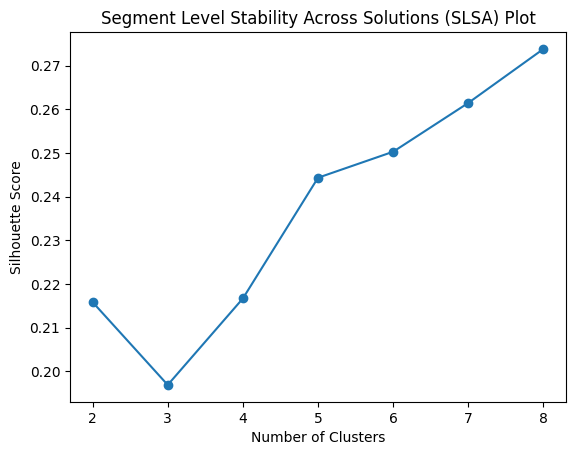

In [38]:
slsa_plot(scaled_data, cluster_range)

In [39]:
# Segment Level Stability Within Solutions (SLSW) Plot
def slsw_plot(data, cluster_range, n_resamples=10):
    silhouette_scores = []
    for k in cluster_range:
        scores = []
        for _ in range(n_resamples):
            resampled_data = resample(data, replace=True, random_state=42)
            kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
            kmeans.fit(resampled_data)
            scores.append(silhouette_score(resampled_data, kmeans.labels_))
        silhouette_scores.append(np.mean(scores))
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Segment Level Stability Within Solutions (SLSW) Plot')
    plt.show()

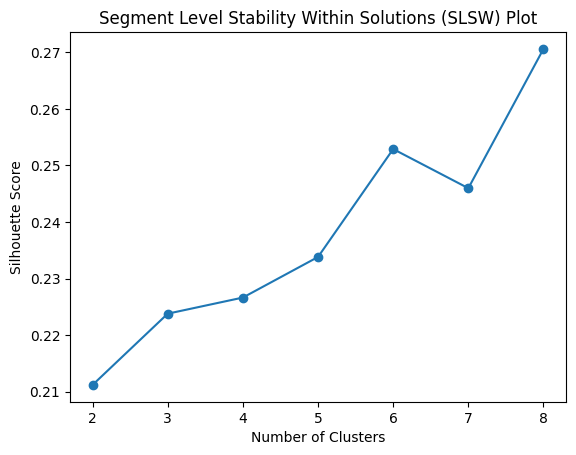

In [40]:
slsw_plot(scaled_data, cluster_range)

In [41]:
optimal_kmeans = KMeans(n_clusters=4, n_init=10, random_state=42)
optimal_kmeans.fit(scaled_data)

KMeans(n_clusters=4, n_init=10, random_state=42)

In [42]:
optimal_gmm = GaussianMixture(n_components=4, n_init=10, random_state=42)
optimal_gmm.fit(scaled_data)

GaussianMixture(n_components=4, n_init=10, random_state=42)

In [43]:
optimal_hierarchical = AgglomerativeClustering(n_clusters=4)
optimal_hierarchical.fit(scaled_data)

AgglomerativeClustering(n_clusters=4)

In [44]:
# Segment Profile Plot
def segment_profile_plot(data, labels):
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    melted_data = data_with_labels.melt(id_vars='Cluster', var_name='Feature', value_name='Value')
    plt.figure(figsize=(12, 8))
    sns.violinplot(data=melted_data, x='Feature', y='Value', hue='Cluster', split=True, inner='quart')
    plt.title('Segment Profile Plot')
    plt.xticks(rotation=45)
    plt.show()

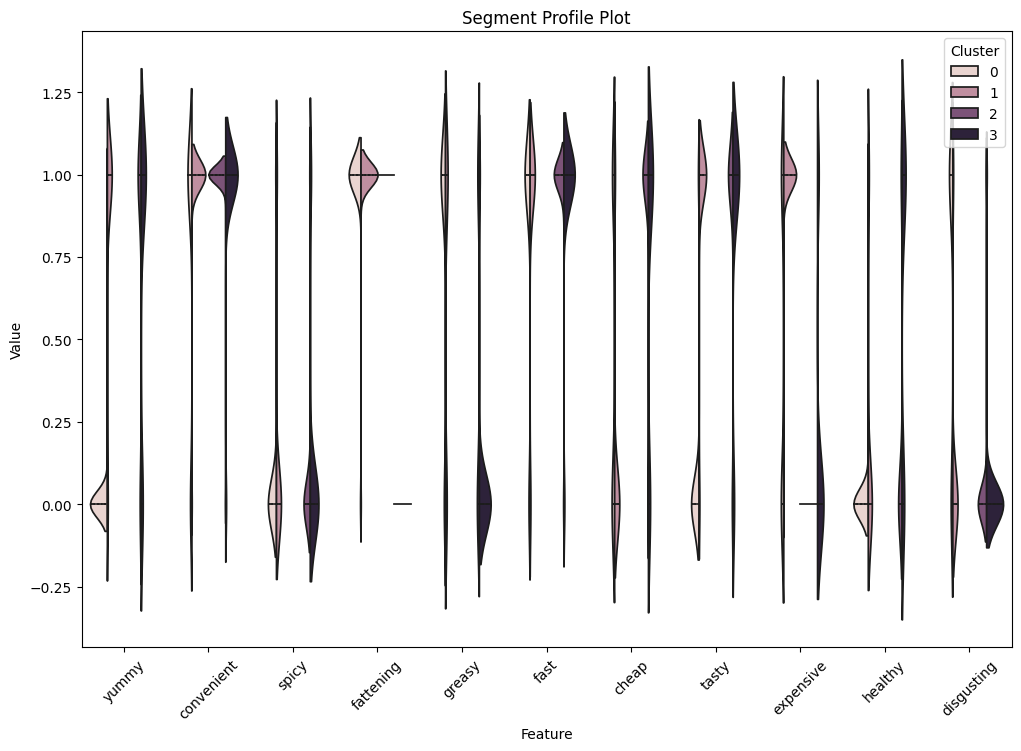

In [45]:
segment_profile_plot(data, optimal_kmeans.labels_)

In [46]:
# Segment Separation Plot
def segment_separation_plot(data, labels, pca_data):
    plt.figure(figsize=(10, 8))
    for cluster in np.unique(labels):
        plt.scatter(pca_data[labels == cluster, 0], pca_data[labels == cluster, 1], label=f'Cluster {cluster}')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title('Segment Separation Plot')
    plt.legend()
    plt.show()

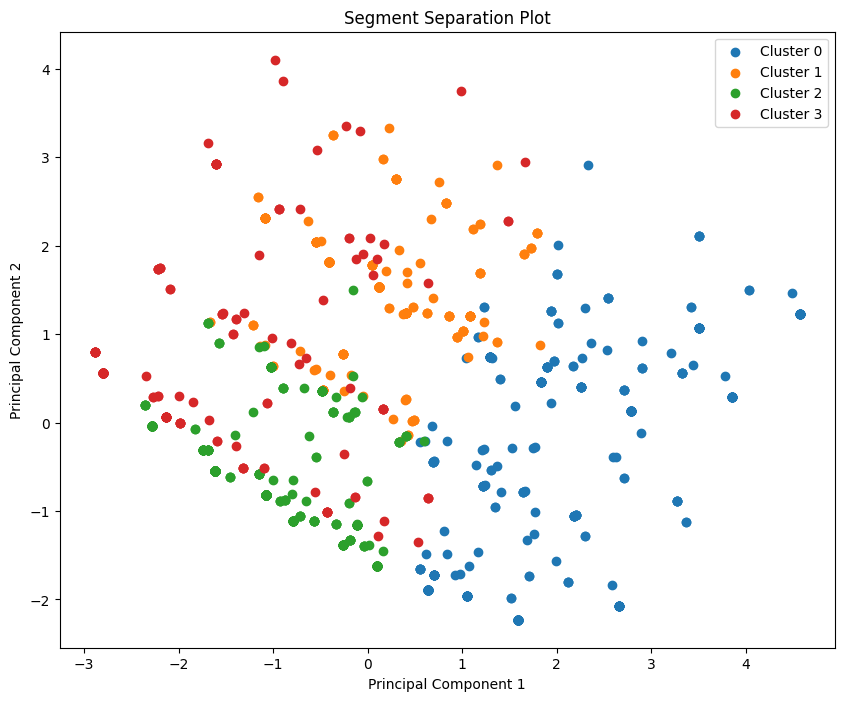

In [47]:
segment_separation_plot(scaled_data, optimal_kmeans.labels_, pca_data)

In [48]:
# Shaded Mosaic Plot for Cross-Tabulation of Segment Membership
def shaded_mosaic_plot(data, labels, categorical_feature):
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    ct = pd.crosstab(data_with_labels[categorical_feature], data_with_labels['Cluster'], normalize='index')
    plt.figure(figsize=(10, 8))
    sns.heatmap(ct, cmap='Blues', annot=True, fmt=".2f")
    plt.title(f'Shaded Mosaic Plot for Cross-Tabulation of Segment Membership ({categorical_feature})')
    plt.xlabel('Cluster')
    plt.ylabel(categorical_feature)
    plt.show()

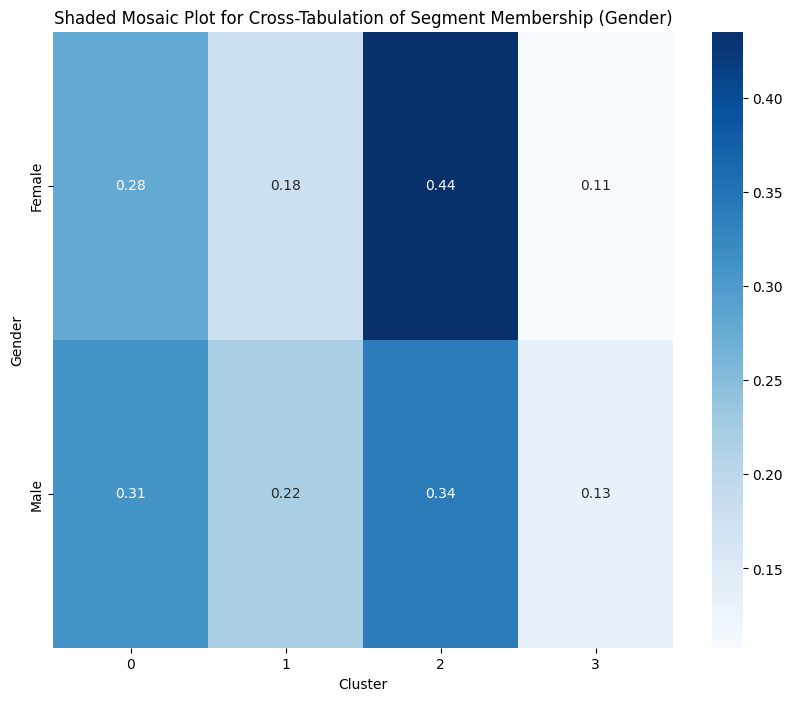

In [49]:
shaded_mosaic_plot(mcdata, optimal_kmeans.labels_, 'Gender')

In [50]:
# Parallel Box-and-Whisker Plot of Age by Segment
def parallel_boxplot(data, labels):
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data_with_labels, x='Cluster', y='Age')
    plt.title('Parallel Box-and-Whisker Plot of Age by Segment')
    plt.xlabel('Cluster')
    plt.ylabel('Age')
    plt.show()

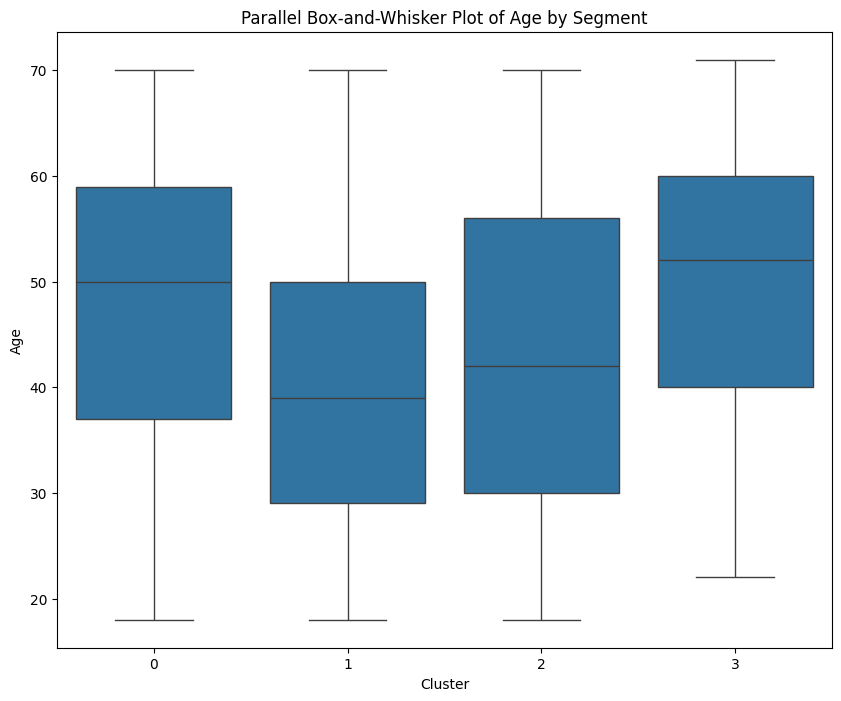

In [51]:
parallel_boxplot(mcdata, optimal_kmeans.labels_)

In [52]:
# Inference Tree
def inference_tree(data, labels):
    data_with_labels = data.copy()
    data_with_labels['Cluster'] = labels
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(data, labels)
    plt.figure(figsize=(12, 8))
    tree.plot_tree(clf, feature_names=data.columns, class_names=[str(i) for i in np.unique(labels)], filled=True)
    plt.title('Inference Tree')
    plt.show()

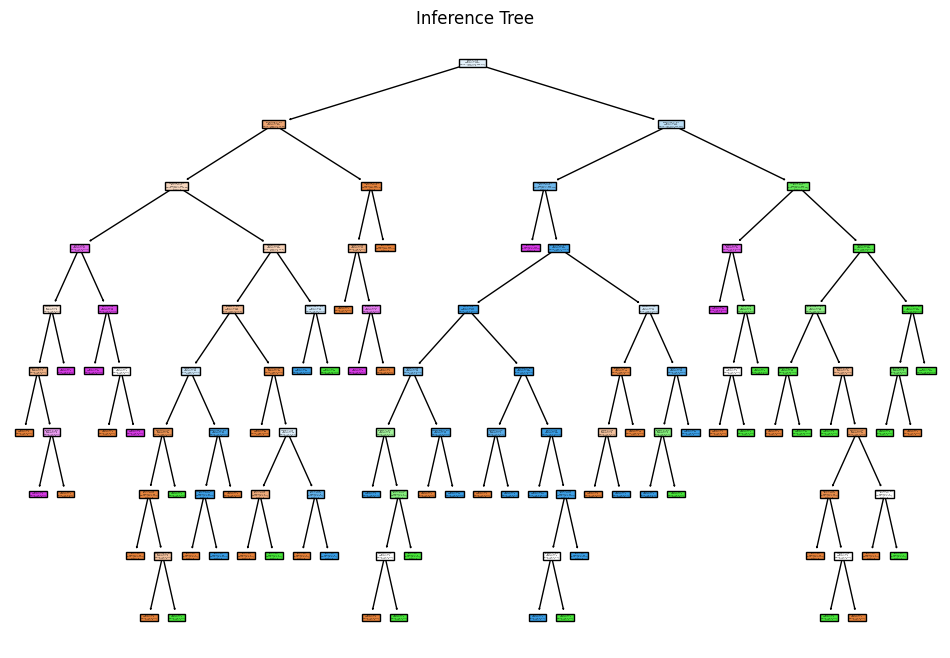

In [53]:
inference_tree(data, optimal_kmeans.labels_)